### Part A
#### 1.

The PDF of stress factor x is given by:

$$ p(x|\theta) = \frac{1}{\pi}\frac{1}{1 + (x - \theta)^2} \quad, $$

where theta is an unknown constant. We assume that the samples $ D_j , j = 1, 2 $ are Independent Identically Distributed
(i.i.d.) i.e.  they have been drawn independently from the same distribution $ p(x|\theta_j, \omega_j) $. Thus, the 
common PDF from the samples is:

$$ p(D_j | \theta_j) = \prod_{i=1}^{N_j} p(x_i | \theta_j), \quad j = 1, 2 \quad. $$

We will use the Maximum Likelihood (ML) Method to estimate the parameters $\hat{\theta}_1, \hat{\theta}_2$. Therefore, 
we want to maximize the log-likelihood function:

$$ L(D_j | \theta_j) = \sum_{i=1}^{N_j} \log p(x_i | \theta_j), \quad j = 1, 2 \quad, $$

with respect to $ \theta_j $.

#### 2.

Consider the Bayes Decision Rule:

$$ P(\omega_1 | x) > P(\omega_2 | x) $$

or

$$ \frac{p(x|\omega_1) P(\omega_1)}{p(x)} > \frac{p(x|\omega_2) P(\omega_2)}{p(x)} $$

or

$$ \log p(x|\omega_1) + \log P(\omega_1) > \log p(x|\omega_2) + \log P(\omega_2), $$

where the class conditional densities $p(x|\omega_1), p(x|\omega_2)$ have already been computed using ML estimation. 
By selecting as discriminant function the:

$$ g(x) = \log p(x|\omega_1) - \log p(x|\omega_2) + \log P(\omega_1) - \log P(\omega_2) \quad, $$

we classify the element with feature $x$ to class $\omega_1$ if $g(x) > 0$ and to $\omega_2$ otherwise.


theta1 (no stress): 2.599795604752384
theta2 (intense stress): -3.1585766804948574


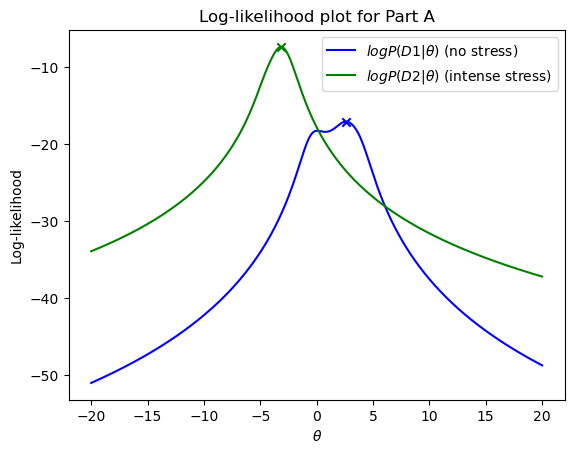

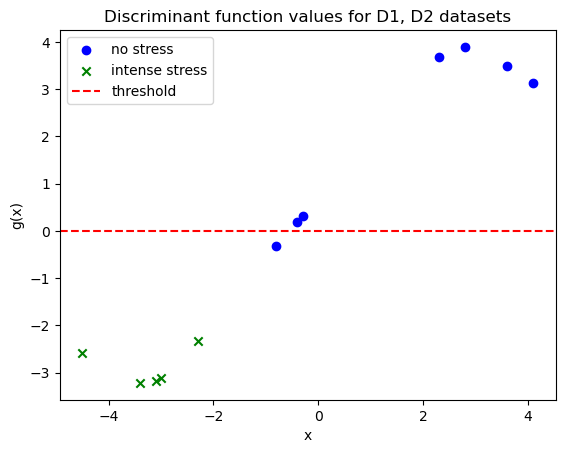

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])  # No stress data
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])  # Intense stress data

class ClassifierA:

    @staticmethod
    def p_x_theta(theta, x):
        """
        Compute the probability of x given a specific theta. If theta is a 1D array
        of M elements and x is 1D array of N elements it returns a matrix M x N where
        the element at row i and column j is the evaluation of the PDF at point x[j]
        for theta[i].
        
        Args:
            theta: Scalar or array, location parameter of the distribution
            x: Scalar or array, the data points to evaluate
        
        Returns:
            numpy.ndarray: The probability for each x given theta
        """
        x = np.asarray(x)  # Ensure x is an array
        theta = np.asarray(theta)  # Ensure theta is an array
        # Convert theta to 1D array if it is a scalar
        if theta.ndim == 0:
            theta = np.array([theta])
        return 1 / (1 + (x - theta[:, np.newaxis]) ** 2) / np.pi

    @staticmethod
    def loglkhood(theta, D):
        """
        Compute the log-likelihood for the data D given the parameter theta.
        If theta is a 1D array of M elements it returns a 1D array of M elements,
        that is the log-likelihood of the data D for each theta value.
        
        Args:
            theta: Scalar or array, the parameter for the distribution
            D: Scalar or array, the dataset for which the log-likelihood is computed
        
        Returns:
            numpy.ndarray: The log-likelihood of the data given theta
        """
        # Row-wise sum of the log of probabilities computed for each data point in D
        # each row corresponds to a different theta value
        return np.sum(np.log(ClassifierA.p_x_theta(theta, D)), axis=1)

    @staticmethod
    def fit(D, theta_canditates):
        """
        Fit the model by finding the theta that maximizes the log-likelihood function 
        (minimizing the negative log-likelihood).
        
        Args:
            D: Scalar or array, the dataset
            theta_candidates: Array of candidate thetas to search for the optimal theta
        
        Returns:
            float: The optimal theta value that maximizes the log-likelihood for the dataset
        """
        fun_values = np.zeros(len(theta_canditates))  # Array to store function values
        theta_values = np.zeros(len(theta_canditates))  # Array to store corresponding theta values

        # Loop over candidate thetas, and minimize the negative log-likelihood
        for i, x0 in enumerate(theta_canditates):
            # Maximize log-likelihood by minimizing the negation of it using a lambda function
            result = minimize(lambda theta: -ClassifierA.loglkhood(theta, D), x0, method='BFGS')
            theta_values[i] = result.x[0]  # Best theta value for the specific starting point
            fun_values[i] = result.fun  # Negative log-likelihood corresponding to the best theta

        idx = np.argmin(fun_values)  # Find the index with the minimum function value
        return theta_values[idx]  # Return the optimal theta
    
    @staticmethod
    def predict(D, p1, p2, theta1, theta2):
        """
        Predict the class of each data point by evaluating a discriminant function.
        If theta1 is 1D array of M elements, theta2 is 1D array of K elements and 
        D is 1D array of N elements it returns a 2D array of max(M, K) x N elements 
        where the element at row i and column j is the prediction of D[j] corresponding 
        to theta1[i] and theta2[i] parameters.
        
        Args:
            D: Scalar or array, the dataset for which predictions are to be made
            p1: float, apriori probability of class 1 (no stress)
            p2: float, apriori probability of class 2 (intense stress)
            theta1: Scalar or array, optimal theta for class 1 (no stress)
            theta2: Scalar or array, optimal theta for class 2 (intense stress)
        
        Returns:
            numpy.ndarray: The predicted discriminant function values for each data point
        """
        return np.log(ClassifierA.p_x_theta(theta1, D)) - np.log(ClassifierA.p_x_theta(theta2, D)) + np.log(p1) - np.log(p2)


clf = ClassifierA()  # Create an instance of the Classifier
# Candidate thetas for D1, on the interval where the optimal theta lies, as observed from the plot
theta_candidates = np.linspace(-5., 5., 10)
theta1 = clf.fit(D1, theta_candidates)
# Candidate thetas for D2, on the interval where the optimal theta lies, as observed from the plot
theta_candidates = np.linspace(-5., 0., 10)
theta2 = clf.fit(D2, theta_candidates)
print(f'theta1 (no stress): {theta1}')
print(f'theta2 (intense stress): {theta2}')

# Compute log-likelihood values for both classes
theta_max = 20
npoints = 1000
x = np.linspace(-theta_max, theta_max, npoints)  # Range for theta values
y1 = clf.loglkhood(x, D1)  # Log-likelihood for D1
y2 = clf.loglkhood(x, D2)  # Log-likelihood for D2

# Plot the log-likelihood curves for both datasets
plt.plot(x, y1, label=r'$logP(D1|\theta)$ (no stress)', color='blue')
plt.plot(x, y2, label=r'$logP(D2|\theta)$ (intense stress)', color='green')

# Mark the optimal theta values on the plot
plt.scatter(theta1, clf.loglkhood(theta1, D1), color='blue', marker='x')
plt.scatter(theta2, clf.loglkhood(theta2, D2), color='green', marker='x')

# Labeling the plot
plt.xlabel(r'$\theta$')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood plot for Part A')
plt.legend()
plt.show()

# Calculate apriori probabilities for each class
N1 = len(D1)
N2 = len(D2)
p1 = N1 / (N1 + N2)
p2 = N2 / (N1 + N2)

# Get the discriminant values for the two classes
predictions1 = clf.predict(D1, p1, p2, theta1, theta2)
predictions2 = clf.predict(D2, p1, p2, theta1, theta2)

# Scatter plot of the data points and the discriminant function values
plt.scatter(D1, predictions1, label='no stress', color='blue', marker='o')
plt.scatter(D2, predictions2, label='intense stress', color='green', marker='x')

# Add a horizontal dashed line (threshold for classification)
plt.axhline(y=0.0, color='red', linestyle='--', label="threshold")

# Labeling the plot
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Discriminant function values for D1, D2 datasets')
plt.legend()
plt.show()

### Part B

#### 1.

The apriori PDF of $\theta$ is given by:

$$ p(\theta) = \frac{1}{10\pi} \frac{1}{1 + (\theta / 10)^2} $$

The likelihood $ p(D|\theta) $ is computed by:

$$ p(D_j|\theta) = \prod_{n=1}^{N_j} p(x_n|\theta), \quad j = 1, 2 \quad. $$

The a posteriori PDF will be:

$$ p(\theta|D_j) = \frac{p(D_j|\theta) p(\theta)}{\int p(D_j|\theta) p(\theta) \, d\theta}, \quad j = 1, 2. $$

#### 2.

Consider Bayesian Estimation Rule:

$$ p(\omega_1 | x, D_1) > p(\omega_2 | x, D_2) $$

or

$$ 
\frac{p(x | D_1) P(\omega_1)}{p(x | D_1) P(\omega_1) + p(x | D_2) P(\omega_2)} > 
\frac{p(x | D_2) P(\omega_2)}{p(x | D_1) P(\omega_1) + p(x | D_2) P(\omega_2)}
$$

or

$$ \log p(x | D_1) + \log P(\omega_1) > \log p(x | D_2) + \log P(\omega_2) \quad. $$

By selecting as discriminant function the:

$$ h(x) = \log p(x | D_1) - \log p(x | D_2) + \log P(\omega_1) - \log P(\omega_2) \quad, $$

we classify the element with feature $x$ to class $\omega_1$ if $h(x) > 0$ and to $\omega_2$ otherwise.



theta1 (no stress): 2.6026026026026017
theta2 (intense stress): -3.163163163163162


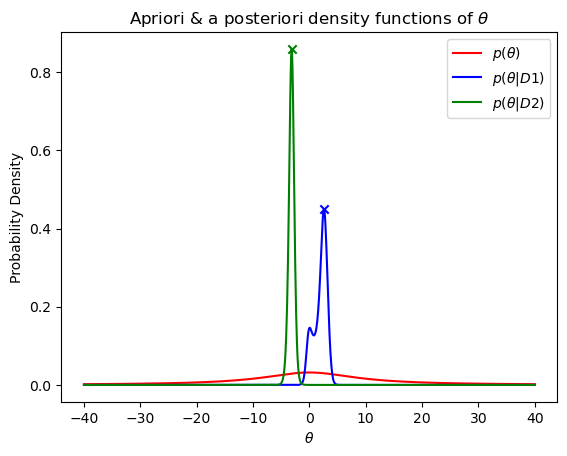

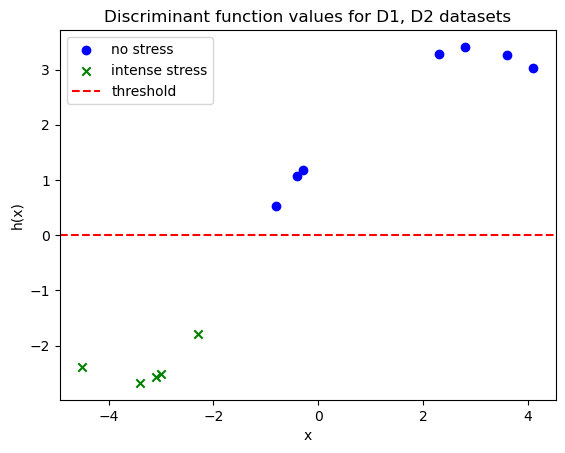

In [18]:
class ClassifierB:

    @staticmethod
    def p_x_theta(theta, x):
        """
        Compute the probability of x given a specific theta. If theta is a 1D array
        of M elements and x is 1D array of N elements it returns a matrix M x N where
        the element at row i and column j is the evaluation of the PDF at point x[j]
        for theta[i].
        
        Args:
            theta: Scalar or array, location parameter of the distribution
            x: Scalar or array, the data points to evaluate
        
        Returns:
            numpy.ndarray: The probability for each x given theta
        """
        x = np.asarray(x)  # Ensure x is an array
        theta = np.asarray(theta)  # Ensure theta is an array
        # Convert theta to 1D array if it is a scalar
        if theta.ndim == 0:
            theta = np.array([theta])
        return 1 / (1 + (x - theta[:, np.newaxis]) ** 2) / np.pi

    @staticmethod
    def p_theta(theta):
        """
        Compute the apriori probability density function of theta.
        If theta is a 1D array of M elements it returns a 1D array with
        M elements with the evaluations of the function for each theta value.
        
        Args:
            theta: Scalar or array, the parameter values to evaluate.
        
        Returns:
            numpy.ndarray: The prior probability for each theta.
        """
        theta = np.asarray(theta)  # Ensure theta is an array
        return 1 / (1 + (theta / 10) ** 2) / (10 * np.pi)

    @staticmethod
    def p_D_theta(theta, D):
        """
        Compute the likelihood of the dataset D given a parameter theta.
        This is the product of individual probabilities p(x | theta) for all x in D.
        If theta is a 1D array of M elements it returns a 1D array of M elements with
        the likelihood values of the dataset D for each theta parameter.
        
        Args:
            theta: Scalar or array, the parameter values to evaluate.
            D: Scalar of array, the dataset.
        
        Returns:
            numpy.ndarray: The likelihood values for each theta.
        """
        # Computes the product of all elements in each row i.e. the likelihood of each theta given dataset D
        return np.prod(ClassifierB.p_x_theta(theta, D), axis=1)
    
    @staticmethod
    def p_theta_D(theta, D):
        """
        Compute the posterior probability density function using Bayes' theorem.
        If theta is a 1D array of M elements it returns a 1D array of M elements with the 
        evaluation of the posterior PDF at each theta.
        
        Args:
            theta: Scalar or array, the parameter values to evaluate.
            D: Scalar or array, the dataset.
        
        Returns:
            numpy.ndarray: The posterior probability values for each theta.
        """
        theta_max = 1000  # Range limit for theta
        npoints = 5000  # Number of points for numerical integration
        x = np.linspace(-theta_max, theta_max, npoints)  # Theta range for integration
        y = ClassifierB.p_D_theta(x, D) * ClassifierB.p_theta(x)  # Unnormalized posterior
        return ClassifierB.p_D_theta(theta, D) * ClassifierB.p_theta(theta) / np.trapz(y, x)
    
    @staticmethod
    def p_x_D(x, D):
        theta_max = 1000  # Range limit for theta
        npoints = 5000  # Number of points for numerical integration
        theta_values = np.linspace(-theta_max, theta_max, npoints)  # Theta range for integration

        # Compute posterior pdf values accross the theta range and convert it to a column vector
        posterior = ClassifierB.p_theta_D(theta_values, D)[:, np.newaxis]

        # Compute the values of p(x | theta) * p(theta | D) accross the range of theta for each point x
        # Each row corresponds to the same theta and each column to the same x
        p_values = posterior * ClassifierB.p_x_theta(theta_values, x)
        
        # Integrate along the rows for each column to get the evaluation of p(x | D) at each point x
        return np.trapz(p_values, theta_values, axis=0)

    @staticmethod
    def predict(D, D1, D2, p1, p2):
        """
        Predict the class of each data point by evaluating a discriminant function.
        
        Args:
            D: Scalar or array, the dataset for which predictions are to be made
            D1: Training dataset for class 1 (no stress)
            D2: Training dataset for class 2 (intense stress)
            p1: float, apriori probability of class 1 (no stress)
            p2: float, apriori probability of class 2 (intense stress)
        
        Returns:
            numpy.ndarray: The predicted discriminant function values for each data point
        """
        return np.log(ClassifierB.p_x_D(D, D1)) - np.log(ClassifierB.p_x_D(D, D2)) + np.log(p1) - np.log(p2)


clf = ClassifierB()  # Create an instance of the Classifier
theta_max = 40  # Range limit for theta
npoints = 1000  # Number of points to plot
x = np.linspace(-theta_max, theta_max, npoints)  # Theta range for plotting
y = clf.p_theta(x)  # Apriori pdf values for theta
y1 = clf.p_theta_D(x, D1)  # A posteriori pdf values for theta given dataset D1
y2 = clf.p_theta_D(x, D2)  # A posteriori pdf values for theta given dataset D2

idx1 = np.argmax(y1)  # Find the index of the maximum value of the posterior pdf given D1
idx2 = np.argmax(y2)  # Find the index of the maximum value of the posterior pdf given D2
print(f'theta1 (no stress): {x[idx1]}')  # Print theta value that gives the maximum a posteriori pdf value given D1
print(f'theta2 (intense stress): {x[idx2]}')  # Print theta value that gives the maximum a posteriori pdf value given D2

# Plot prior and posterior pdf of theta
plt.plot(x, y, label=r'$p(\theta)$', color='red')
plt.plot(x, y1, label=r'$p(\theta|D1)$', color='blue')
plt.plot(x, y2, label=r'$p(\theta|D2)$', color='green')

# Mark the peak points of the posterior pdfs
plt.scatter(x[idx1], y1[idx1], color='blue', marker='x')
plt.scatter(x[idx2], y2[idx2], color='green', marker='x')

# Labeling the plot
plt.xlabel(r'$\theta$')
plt.ylabel('Probability Density')
plt.title(r'Apriori & a posteriori density functions of $\theta$')
plt.legend()
plt.show()

# Get the discriminant values for the two classes
predictions1 = clf.predict(D1, D1, D2, p1, p2)
predictions2 = clf.predict(D2, D1, D2, p1, p2)

# Scatter plot of the data points and the discriminant function values
plt.scatter(D1, predictions1, label='no stress', color='blue', marker='o')
plt.scatter(D2, predictions2, label='intense stress', color='green', marker='x')

# Add a horizontal dashed line (threshold for classification)
plt.axhline(y=0.0, color='red', linestyle='--', label="threshold")

# Labeling the plot
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title('Discriminant function values for D1, D2 datasets')
plt.legend()
plt.show()


We see that the a posteriori density functions $p(\theta | D_j)$ are very sharp at $\hat{\theta}_j$, where
$\hat{\theta}_j$ is very close to the ML estimation. Thus, the influence of the prior information on the 
uncertainty of the value of $\theta$ can be ignored. 

It is evident that Bayesian Estimation gives us better results than ML estimation. This is beacause BE takes 
into account the prior distribution of the $\theta$ parameter, leading to better solutions.


### Part C

Decision Tree: Best depth=2, Accuracy=0.7466666666666667


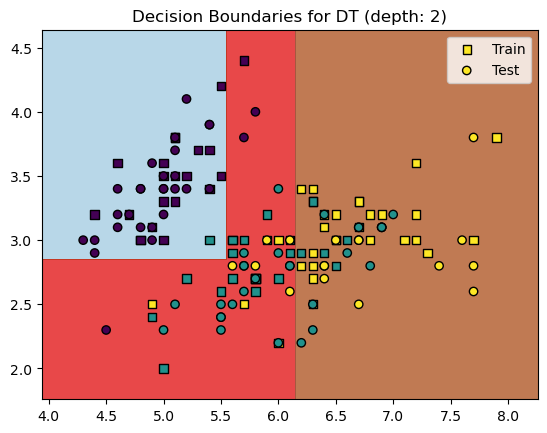

Random Forest: Best depth=51, Accuracy=0.7733333333333333


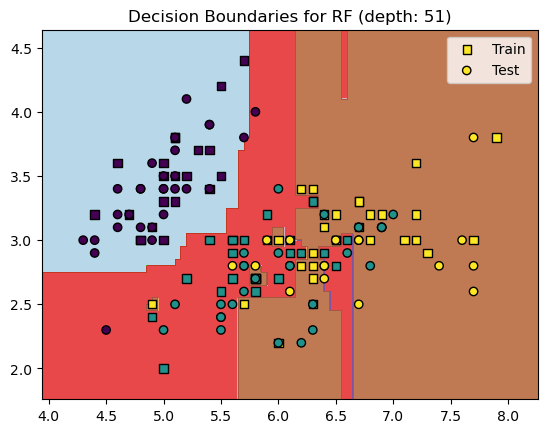

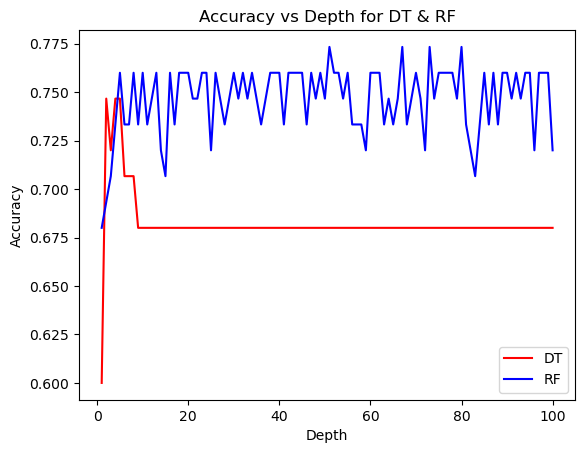

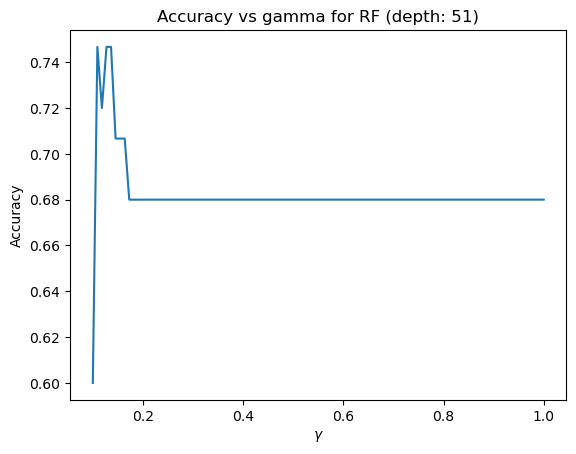

In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random

iris = load_iris()  # Load the Iris dataset
rnd_seed = random.randint(0, 100)  # Random seed for reproducibility

X = iris.data[:, :2]  # Extract the first two features of the dataset
y = iris.target  # Get the target values of the dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rnd_seed)
max_depth = 100  # Maximum depth of the tree
depths = np.arange(1, max_depth + 1)  # Range of depths

# ================================ Section 1 ================================

accuracies_DT = np.zeros(max_depth)  # accuracy achieved for each depth of the decision tree

# Test the accuracy of the DT for different tree depths
for depth in depths:
    # Create an instance of the classifier
    clf = DecisionTreeClassifier(max_depth=depth, random_state=rnd_seed)
    clf.fit(X_train, y_train)  # Train the classifier with the training data
    y_pred = clf.predict(X_test)  # Find predictions of the model for the test set
    accuracies_DT[depth - 1] = accuracy_score(y_test, y_pred)  # Calculate accuracy of the model

best_depth_DT = np.argmax(accuracies_DT) + 1  # Find the depth of the tree that gives the best accuracy
best_accuracy_DT = accuracies_DT[best_depth_DT - 1]  # Find the best accuracy
print(f'Decision Tree: Best depth={best_depth_DT}, Accuracy={best_accuracy_DT}')

# Create a meshgrid to plot decision boundaries
npoints = 1000
x_min, x_max = X[:, 0].min(), X[:, 0].max()  # Define x-axis range
y_min, y_max = X[:, 1].min(), X[:, 1].max()  # Define y-axis range
x_margin = 0.1 * (x_max - x_min)  # Define x-axis margin
y_margin = 0.1 * (y_max - y_min)  # Define y-axis margin
xx, yy = np.meshgrid(np.linspace(x_min - x_margin, x_max + x_margin, npoints), 
                     np.linspace(y_min - y_margin, y_max + y_margin, npoints))

# Create an instance of the classifier with the optimal tree depth
clf = DecisionTreeClassifier(max_depth=best_depth_DT, random_state=rnd_seed)
clf.fit(X_train, y_train)  # Train the classifier with the training data

# Predict the class for each point in the grid
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # Use grid points as input
predictions = predictions.reshape(xx.shape)  # Reshape predictions to match the grid's shape

# Plot the decision boundaries
plt.contourf(xx, yy, predictions, alpha=0.8, cmap=plt.cm.Paired)

# Plot the training and testing points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='s', edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', edgecolor='k', label='Test')

plt.title(f'Decision Boundaries for DT (depth: {best_depth_DT})')
plt.legend()
plt.show()

# ================================ Section 2 ================================

class RandomForestClassifier:
    def __init__(self, max_depth, B, random_state):
        self.max_depth = max_depth
        self.B = B
        self.random_state = random_state

    def train_predict(self, X_train, y_train, X):
        predictions = np.zeros(X.shape[0])  # cumulative prediction values of each tree
        # Create an instance of DT classifier
        clf = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
        for _ in range(0, self.B):
            # indices of the original training data to train the DT classifier
            idx = np.random.randint(0, X_train.shape[0], X_train.shape[0])
            X_train_boot = X_train[idx,:]
            y_train_boot = y_train[idx]
            clf.fit(X_train_boot, y_train_boot)  # Train the classifier with the bootstrap sample
            predictions += clf.predict(X)  # Get the predictions of the model for the test set
        return np.round(predictions / self.B).astype(int)  # Return the majority voting of the decision trees


B = 100  # Number of bootstrap samples
gamma = 0.5  # Fraction of the original training data to use for bootstrap sampling
boot_size = int(np.floor(gamma * X_train.shape[0]))  # Bootstrap sample size
idx = np.random.choice(np.arange(0, X_train.shape[0]), size=boot_size, replace=False)
X_train_gamma = X_train[idx,:]
y_train_gamma = y_train[idx]
accuracies_RF = np.zeros(max_depth)  # Accuracy achieved by the Random Forest Classifier for each tree depth

# Test the accuracy of the RF for different tree depths
for depth in depths:
    clf = RandomForestClassifier(depth, B, rnd_seed)  # Create an instance of the RF classifier
    y_pred = clf.train_predict(X_train_gamma, y_train_gamma, X_test)  # Train and test the cassifier
    accuracies_RF[depth - 1] = accuracy_score(y_test, y_pred)  # Compute the accuracy

best_depth_RF = np.argmax(accuracies_RF) + 1  # Find the depth of the tree that gives the best accuracy for RF
best_accuracy_RF = accuracies_RF[best_depth_RF - 1]  # Find the best accuracy for RF
print(f'Random Forest: Best depth={best_depth_RF}, Accuracy={best_accuracy_RF}')

# Create an instance of the random forest classifier with the optimal depth
clf = RandomForestClassifier(best_depth_RF, B, rnd_seed)
# Train the classifier with a fraction of the original training data and 
# then use the grid points as inputs for prediction
predictions = clf.train_predict(X_train, y_train, np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)  # Reshape predictions to match the grid's shape

# Plot the decision boundaries
plt.contourf(xx, yy, predictions, alpha=0.8, cmap=plt.cm.Paired)

# Plot the training and testing points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='s', edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', edgecolor='k', label='Test')

plt.title(f'Decision Boundaries for RF (depth: {best_depth_RF})')
plt.legend()
plt.show()

# Plot the accuracy versus the depth of the tree for DT and RF
plt.plot(depths, accuracies_DT, label='DT', color='red')
plt.plot(depths, accuracies_RF, label='RF', color='blue')
plt.title('Accuracy vs Depth for DT & RF')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

gammas = np.linspace(0.1, 1, 100)  # gamma parameter range
accuracies_RF = np.zeros(gammas.size)

# Test the accuracy of the RF for different values of the gamma parameter
# for fixed tree depth equal to the optimal
for i in range(0, gammas.size):
    boot_size = int(np.floor(gammas[i] * X_train.shape[0]))  # Bootstrap sample size
    idx = np.random.choice(np.arange(0, X_train.shape[0]), size=boot_size, replace=False)
    X_train_gamma = X_train[idx,:]
    y_train_gamma = y_train[idx]
    clf = RandomForestClassifier(best_depth_RF, B, rnd_seed)  # Create an instance of the RF classifier
    y_pred = clf.train_predict(X_train_gamma, y_train_gamma, X_test)  # Train and test the cassifier
    accuracies_RF[i] = accuracy_score(y_test, y_pred)  # Compute the accuracy

# Plot accuracy versus gamma parameter of the RF for fixed tree depth
plt.plot(gammas, accuracies_DT)
plt.title(f'Accuracy vs gamma for RF (depth: {best_depth_RF})')
plt.xlabel(r'$\gamma$')
plt.ylabel('Accuracy')
plt.show()
